In [2]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the Data

First, load the data and take a look. Make sure the table looks good.

In [15]:
gc_df = pd.read_csv('CROG.gene.count.summary.csv')
gc_df.set_index('OG_ID', inplace=True)
gc_df.head(5)

Md.Gala  Md.GDDH  Malsi  Malsy  Pyrbe  Pyrpy.N  Md.HC.A  Md.HC.B  \
OG_ID                                                                     
OG1        211      231    208    213    221      228      206      209   
OG2        301      314    236    224    228      281      250      245   
OG3        201      253    217    201    270      272      217      240   
OG4        373      351    214    273    285      202      311      310   
OG5        159      192    161    122    184      162      159      169   

       Malba  Malfu.A  ...  Malpr  Pc.DA.A  Pc.DA.B  Md.WA38.A  Md.WA38.B  \
OG_ID                  ...                                                  
OG1      224      221  ...    188      239      238        242        248   
OG2      227      147  ...    133      125      113        270        336   
OG3      208      232  ...    246      218      198        260        308   
OG4      304      394  ...     20      380      379        111        328   
OG5      145      187  ...    160      190      198        179        224   

       Md.Anton.A  Md.Anton.B  Fuji   M9  MM106  
OG_ID                                            
OG1           217         213   219  212    207  
OG2           258         261   273  260    261  
OG3           290         269   221  215    222  
OG4           322         299   346  357    381  
OG5           202         204   158  152    161  

[5 rows x 21 columns]

In [16]:
gc_df.shape

(9656, 21)

## Create clustermap

Next, remove rows with standard deviation of 0 (Cluster map can't handle STDEV=0)

In [17]:
gc_df_stdev = gc_df.assign(stdev=gc_df.std(axis=1))
gc_df_stdev_0_removed=gc_df_stdev[gc_df_stdev['stdev']>0]
gc_df_stdev_0_removed.shape

(9255, 22)

Now remove the stdev column

In [18]:
gc_df2 = gc_df_stdev_0_removed.drop(columns='stdev')
gc_df2.head(5)

Md.Gala  Md.GDDH  Malsi  Malsy  Pyrbe  Pyrpy.N  Md.HC.A  Md.HC.B  \
OG_ID                                                                     
OG1        211      231    208    213    221      228      206      209   
OG2        301      314    236    224    228      281      250      245   
OG3        201      253    217    201    270      272      217      240   
OG4        373      351    214    273    285      202      311      310   
OG5        159      192    161    122    184      162      159      169   

       Malba  Malfu.A  ...  Malpr  Pc.DA.A  Pc.DA.B  Md.WA38.A  Md.WA38.B  \
OG_ID                  ...                                                  
OG1      224      221  ...    188      239      238        242        248   
OG2      227      147  ...    133      125      113        270        336   
OG3      208      232  ...    246      218      198        260        308   
OG4      304      394  ...     20      380      379        111        328   
OG5      145      187  ...    160      190      198        179        224   

       Md.Anton.A  Md.Anton.B  Fuji   M9  MM106  
OG_ID                                            
OG1           217         213   219  212    207  
OG2           258         261   273  260    261  
OG3           290         269   221  215    222  
OG4           322         299   346  357    381  
OG5           202         204   158  152    161  

[5 rows x 21 columns]

In [19]:
gc_df2.shape

(9255, 21)

/Users/huitingzhang/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


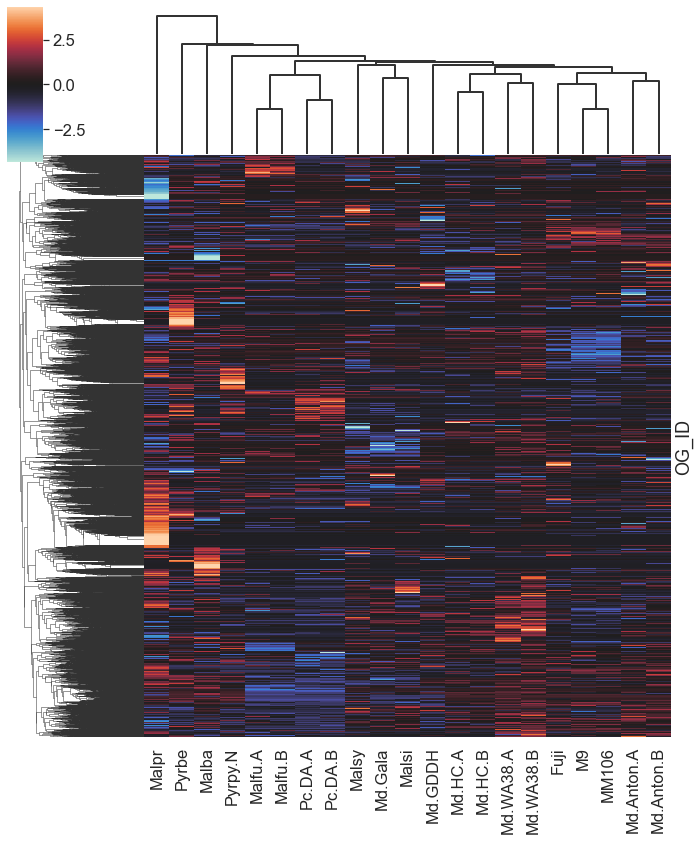

In [20]:
sns.set(font_scale=1.5)
CROG_plot = sns.clustermap(gc_df2, z_score=0, yticklabels=False, cmap='icefire', figsize=(10,12))
# The following increase dandrogram linewidth
for a in CROG_plot.ax_col_dendrogram.collections:
    a.set_linewidth(2)
CROG_plot.savefig("maleae_clustermap_zscore_font1.5_10x12.pdf")

## Boxplt from zscore calculated in excel

In [21]:
manual_zscore_df = pd.read_csv('CROG.gene.count.zscore.reordered.csv')
manual_zscore_df.set_index('OG_ID', inplace=True)
manual_zscore_df.head(5)

Malpr     Pyrbe     Malba   Pyrpy.N   Malfu.A   Malfu.B   Pc.DA.A  \
OG_ID                                                                          
OG2109 -0.218218 -0.218218  4.364358 -0.218218 -0.218218 -0.218218 -0.218218   
OG2197 -0.218218 -0.218218 -0.218218 -0.218218 -0.218218 -0.218218 -0.218218   
OG2230  0.218218  0.218218 -4.364358  0.218218  0.218218  0.218218  0.218218   
OG2349  4.364358 -0.218218 -0.218218 -0.218218 -0.218218 -0.218218 -0.218218   
OG2413 -0.218218  4.364358 -0.218218 -0.218218 -0.218218 -0.218218 -0.218218   

         Pc.DA.B     Malsy   Md.Gala  ...   Md.GDDH   Md.HC.A   Md.HC.B  \
OG_ID                                 ...                                 
OG2109 -0.218218 -0.218218 -0.218218  ... -0.218218 -0.218218 -0.218218   
OG2197 -0.218218 -0.218218  4.364358  ... -0.218218 -0.218218 -0.218218   
OG2230  0.218218  0.218218  0.218218  ...  0.218218  0.218218  0.218218   
OG2349 -0.218218 -0.218218 -0.218218  ... -0.218218 -0.218218 -0.218218   
OG2413 -0.218218 -0.218218 -0.218218  ... -0.218218 -0.218218 -0.218218   

        Md.WA38.A  Md.WA38.B      Fuji        M9     MM106  Md.Anton.A  \
OG_ID                                                                    
OG2109  -0.218218  -0.218218 -0.218218 -0.218218 -0.218218   -0.218218   
OG2197  -0.218218  -0.218218 -0.218218 -0.218218 -0.218218   -0.218218   
OG2230   0.218218   0.218218  0.218218  0.218218  0.218218    0.218218   
OG2349  -0.218218  -0.218218 -0.218218 -0.218218 -0.218218   -0.218218   
OG2413  -0.218218  -0.218218 -0.218218 -0.218218 -0.218218   -0.218218   

        Md.Anton.B  
OG_ID               
OG2109   -0.218218  
OG2197   -0.218218  
OG2230    0.218218  
OG2349   -0.218218  
OG2413   -0.218218  

[5 rows x 21 columns]

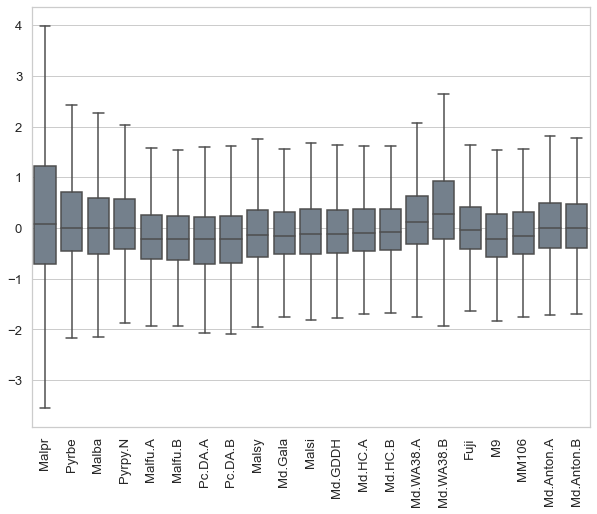

In [23]:
sns.set(rc={'figure.figsize':(10,8), 'figure.subplot.bottom':0.15}, font_scale=1.2, style='whitegrid')
fig, ax = plt.subplots()
plt.xticks(rotation = 90)
sns.boxplot(data=manual_zscore_df, showfliers=False, color="slategray")
plt.savefig("zscore_monocolor_reorder_10x8.pdf")